Importing necessary libraries 

ABOUT DATASET:  
The Colleges and Universities feature class/shapefile is composed of all Post Secondary Education facilities as defined by the Integrated Post Secondary Education System (IPEDS, http://nces.ed.gov/ipeds/), National Center for Education Statistics (NCES, https://nces.ed.gov/), US Department of Education for the 2018-2019 school year

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import folium
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv('us-colleges-and-universities.csv', sep = ';')

df.head()

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,"28.576141693000068, -81.36768715399995","{""coordinates"": [-81.36768715399995, 28.576141...",11,133872,ADVENTHEALTH UNIVERSITY,671 WINYAH DRIVE,ORLANDO,FL,32803,NOT AVAILABLE,...,FLORIDA HOSPITAL COLLEGE,26,2,1032,770,1802,1,174,457,NOT AVAILABLE
1,"26.542857268000034, -80.09219037499997","{""coordinates"": [-80.09219037499997, 26.542857...",59,487445,FLORIDA CAREER COLLEGE-BOYNTON BEACH,1743 NORTH CONGRESS AVENUE,BOYNTON BEACH,FL,33426,8205,...,NOT AVAILABLE,-2,1,-999,681,681,2,-999,42,NOT AVAILABLE
2,"30.013145875000077, -95.44840231499995","{""coordinates"": [-95.44840231499995, 30.013145...",75,450711,TREND BARBER COLLEGE,14806 ELLA BLVD.,HOUSTON,TX,77090,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,-999,74,74,2,-999,13,NOT AVAILABLE
3,"40.13962069400003, -74.96301849199995","{""coordinates"": [-74.96301849199995, 40.139620...",90,443784,STRAYER UNIVERSITY-PENNSYLVANIA,3800 HORIZON BLVD STE 100,TREVOSE,PA,19053,NOT AVAILABLE,...,NOT AVAILABLE,19,2,2040,150,2190,2,-999,-999,NOT AVAILABLE
4,"39.880220552000026, -75.00528053499994","{""coordinates"": [-75.00528053499994, 39.880220...",122,486734,JOLIE HEALTH & BEAUTY ACADEMY-CHERRY HILL,1490 BERLIN RD STE 21,CHERRY HILL,NJ,8003,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,14,62,76,2,-999,9,NOT AVAILABLE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   6559 non-null   object 
 1   Geo Shape   6559 non-null   object 
 2   OBJECTID    6559 non-null   int64  
 3   IPEDSID     6559 non-null   int64  
 4   NAME        6559 non-null   object 
 5   ADDRESS     6558 non-null   object 
 6   CITY        6559 non-null   object 
 7   STATE       6559 non-null   object 
 8   ZIP         6559 non-null   int64  
 9   ZIP4        6559 non-null   object 
 10  TELEPHONE   6559 non-null   object 
 11  TYPE        6559 non-null   int64  
 12  STATUS      6559 non-null   object 
 13  POPULATION  6559 non-null   int64  
 14  COUNTY      6559 non-null   object 
 15  COUNTYFIPS  6559 non-null   object 
 16  COUNTRY     6559 non-null   object 
 17  LATITUDE    6559 non-null   float64
 18  LONGITUDE   6559 non-null   float64
 19  NAICS_CODE  6559 non-null  

In [6]:
df.describe()

,OBJECTID,IPEDSID,ZIP,TYPE,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,SECTOR,LEVEL_,...,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP
count,6559.00000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,...,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000
mean,3280.00000,290230.601006,49006.583473,2.010215,3495.304010,37.209344,-90.511778,611363.538802,5.763226,1.810794,...,19.792194,6587.570209,8.614880,1.526452,854.410276,1774.002134,2944.302943,1.532551,-188.192255,485.355542
std,1893.56454,140513.800011,30226.485810,1.007771,8769.568327,5.949359,18.113995,127.592843,11.028694,0.903232,...,9.614955,50252.079755,11.019717,1.238744,3634.161191,5195.132694,7471.088126,0.762894,1718.356611,1727.646896
min,1.00000,100654.000000,602.000000,-3.000000,-999.000000,-14.323171,-170.743175,611210.000000,0.000000,-3.000000,...,-3.000000,-2.000000,-2.000000,-2.000000,-999.000000,-999.000000,-999.000000,-2.000000,-999.000000,-999.000000
25%,1640.50000,171349.500000,23032.500000,1.000000,113.000000,33.884990,-97.688684,611310.000000,2.000000,1.000000,...,12.000000,-2.000000,-2.000000,1.000000,-999.000000,62.000000,88.000000,1.000000,-999.000000,17.000000
50%,3280.00000,223852.000000,46202.000000,2.000000,518.000000,38.627026,-86.391529,611310.000000,4.000000,2.000000,...,21.000000,-2.000000,5.000000,1.000000,57.000000,291.000000,412.000000,2.000000,-999.000000,72.000000
75%,4919.50000,449078.500000,77024.500000,3.000000,2921.000000,41.230782,-78.784893,611511.000000,8.000000,3.000000,...,22.000000,-2.000000,19.000000,2.000000,802.000000,1448.500000,2423.000000,2.000000,237.000000,434.000000
max,6559.00000,496423.000000,99801.000000,3.000000,154991.000000,71.324702,171.378442,611710.000000,99.000000,3.000000,...,43.000000,495767.000000,33.000000,5.000000,93333.000000,147866.000000,147866.000000,2.000000,20580.000000,35030.000000


Ploting universitys location

In [7]:
geojson_file = "us-colleges-and-universities.geojson"
map_center = [37.0902, -95.7129]  # Coordenadas aproximadas dos EUA
zoom_level = 5

mapa = folium.Map(location=map_center, zoom_start=zoom_level)
folium.GeoJson(geojson_file).add_to(mapa)
mapa.save("mapa_geografico.html")


KeyError: 'TOT_ENROLL'

Filtering locations by total enroll


Here we will work with county and their particularity. Seeing the interaction which the data got in each variableand plotting graphs to better visualization 

Top 10 enroll per county

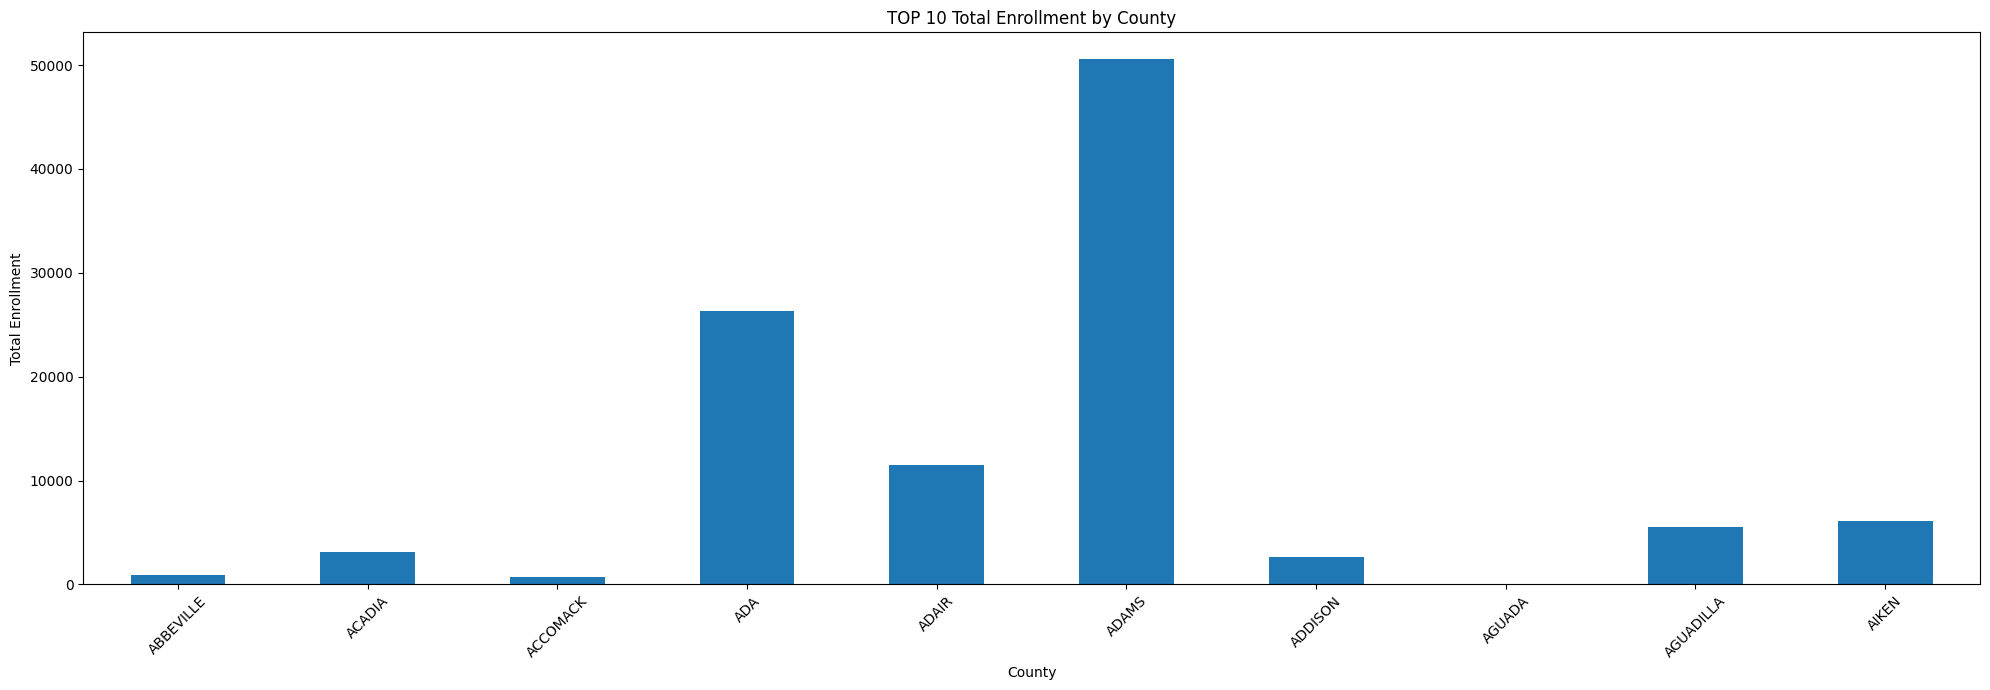

In [ ]:

# Group by 'COUNTY' and calculate the sum of 'TOT_ENROLL'
county_enrollment = df.groupby('COUNTY')['TOT_ENROLL'].sum()
county_enrollment = county_enrollment.head(10)
# Create the bar plot
plt.figure(figsize=(20, 7))
county_enrollment.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Total Enrollment')
plt.title('TOP 10 Total Enrollment by County')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Dispersion graph and Pearsons analysis to correlate our variables.

here is an heatmap who shown to us the most incisive pearsons correlation 

Text(0.5, 1.0, 'Correlation heatmap')

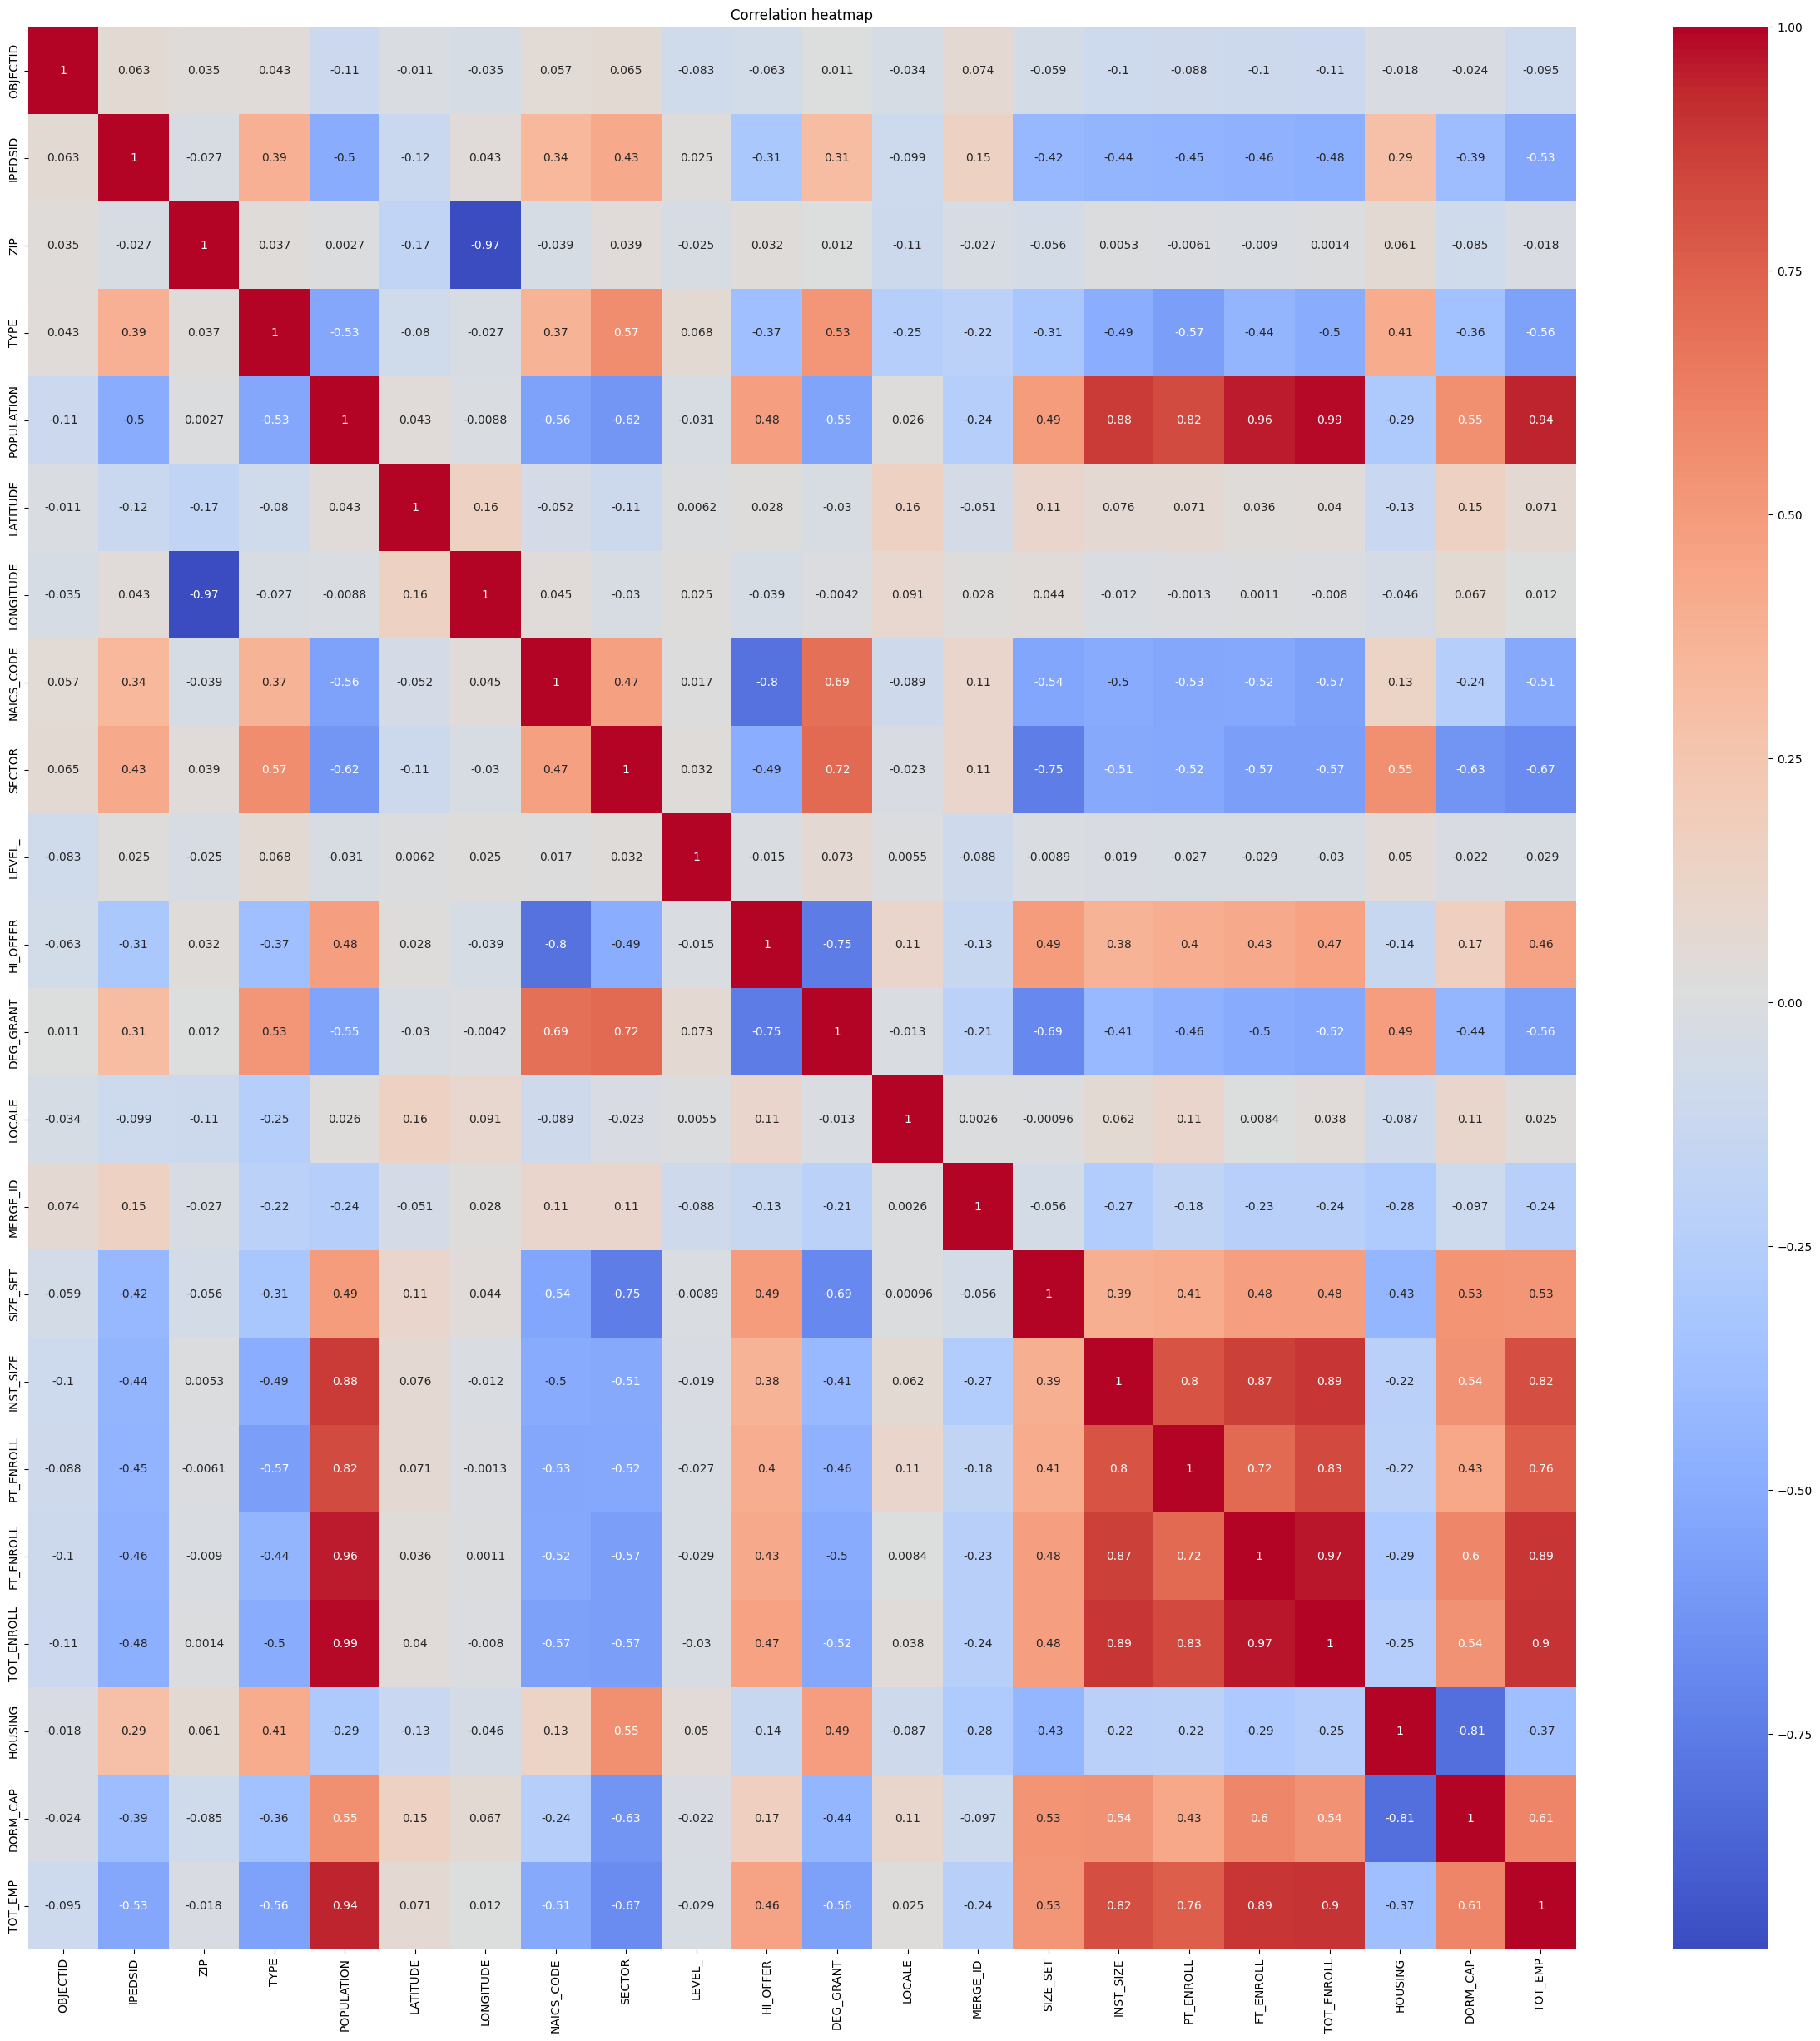

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr('spearman')
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot = True, cmap= 'coolwarm')
plt.title('Correlation heatmap')

Here we got the dispersion graphic, showing the correlation with population variable and the total enrolls. 

Text(0.5, 1.0, 'Scatter Plot of Population vs Total Enrollment')

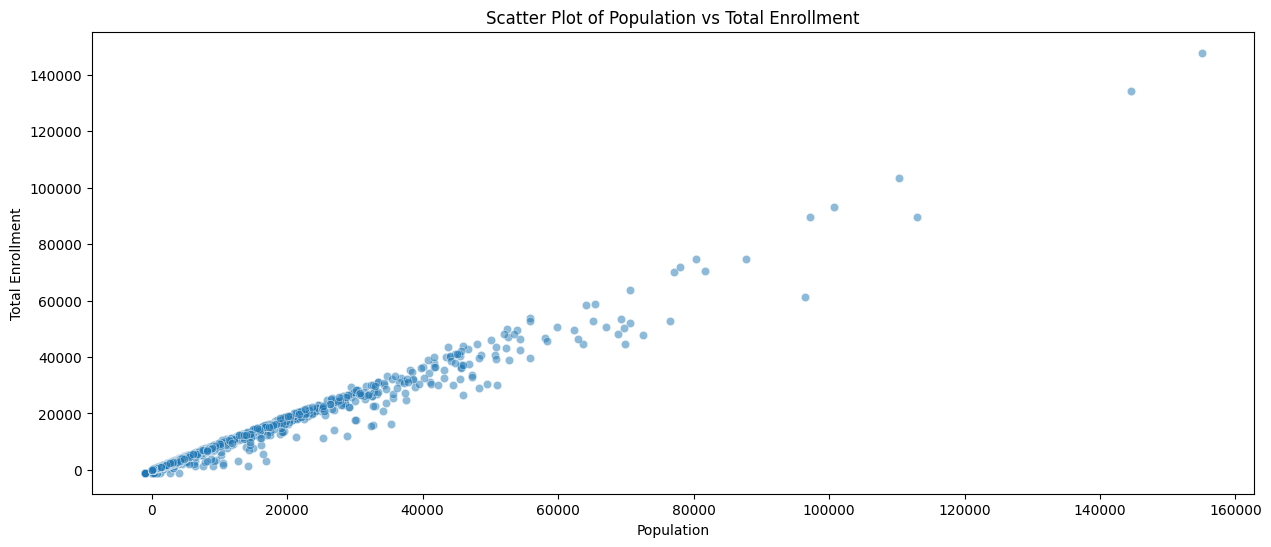

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data= df, x= 'POPULATION', y = 'TOT_ENROLL', alpha = 0.5)
plt.xlabel('Population')
plt.ylabel('Total Enrollment')
plt.title('Scatter Plot of Population vs Total Enrollment')